# Progetto PAA
Autore: Filippo Mameli - 6222254 - filippo.mameli@stud.unifi.it

### Setup del progetto

In [75]:
from sympy import *
from sympy import Sum, factorial, oo
from sympy.abc import i, k, m, n, x
from sympy import sstr
import sys
import math
init_printing()

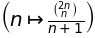

In [2]:
C = Function('C')
n = symbols('n', integer=True)
catalan_expr = 1 / (n + 1) * binomial(2 * n, n)
catalan_rec = Eq(C(n), catalan_expr)
CN = Lambda([n], catalan_expr)
CN

I primi 10 numeri di catalan sono:

In [3]:
[(CN(i).doit()) for i in range(0, 11)]

### Coefficienti binomiali centrali
Sappiamo che la funzione generatrice dei coefficienti binomiali centrali è data da:
$$\sum_{n=0}^{\infty}\binom{2n}{n}x^n = \frac{1}{\sqrt{1-4x}}$$
Si può controllare infatti per i primi dieci elementi che questa relazione è vera

In [4]:
centralN = Lambda([n], binomial(2 * n, n))
centralN

In [5]:
[(centralN(i).doit()) for i in range(0, 11)]

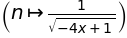

In [6]:
x = symbols('x', integer=True)
centralBinomialCoef_expr = Lambda([n],1 / (sqrt(1 - 4 * x)))
centralBinomialCoef_expr

In [7]:
series(centralBinomialCoef_expr(x), x, n=11)

### Numeri di Catalan
Per i numeri di Catalan invece vale questa relazione:
$$\sum_{n=0}^{\infty}C_nx^n =\sum_{n=0}^{\infty}\frac{1}{n + 1}\binom{2n}{n}x^n = \frac{1-\sqrt{1-4x}}{2x}$$
Infatti:

In [8]:
catalan_expr = Lambda([n],(1 - sqrt(1 - 4 * x)) / (2*x))
catalan_expr
series(catalan_expr(x), x, n=11)

Dalla funzione generatrice dei coefficienti binomiali, i numeri di Catalan e i numeri amonici
sono state ricavate alcune interessanti serie come
$\sum_{n=1}^{\infty}\frac{1}{n^3}H_n = \frac{\pi^4}{72}$ e $\sum_{n=1}^{\infty}\frac{1}{n^2}H_n^2 = \frac{17\pi^4}{360}$

In [106]:
harmonicN =  Lambda([n], Sum(1/k, (k, 1, n)))
h1 = Lambda([n], Sum(1/n**3*harmonicN(n), (n, 1, oo)))
pi**4/72